In [183]:
#Todas las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Actividad 1 "PIB (Producto Interno Bruto) mundial."

El objetivo de esta actividad es encontrar una posible relación o linealidad entre el PIB
(Producto Interno Bruto) de diferentes países del mundo. Los datos fueron descargados
del sitio del Banco Mundial.



## Modelo 1

### Paso 1: Preparación y organización de datos

In [184]:
#importacion dataset PIB
pib = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks_2AÑO1CUATRI/Aprendizaje Automatico/Clase 4/archivos_ejercicios/pib_banco_mundial_50.csv', delimiter=';')
pib

,Country Name,Country Code,2019,2020,2021,2022,2023
0,Argentina,ARG,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,BRA,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,USA,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,CHN,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,IND,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12
5,Germany,DEU,1.740500e+12,1.451500e+12,1.356700e+12,1.823800e+12,4.185000e+11
6,France,FRA,6.020000e+11,6.402000e+11,1.836300e+12,2.447700e+12,1.799200e+12
7,United Kingdom,GBR,2.299700e+12,1.399400e+12,7.928000e+11,1.191400e+12,2.180100e+12
8,Italy,ITA,7.559000e+11,2.445200e+12,7.028000e+11,1.006100e+12,1.090600e+12
9,Spain,ESP,3.763000e+11,4.963000e+11,5.665000e+11,6.679000e+11,7.281000e+11


In [185]:
#Información del dataframe
print('Información del dataframe:')
pib.info()
print('Descripcion del dataframe')
pib.describe()
print('Columnas del dataframe:')
pib.columns

Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  51 non-null     object 
 1   Country Code  51 non-null     object 
 2   2019          51 non-null     float64
 3   2020          51 non-null     float64
 4   2021          51 non-null     float64
 5   2022          51 non-null     float64
 6   2023          51 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB
Descripcion del dataframe
Columnas del dataframe:


Index(['Country Name', 'Country Code', '2019', '2020', '2021', '2022', '2023'], dtype='object')

In [186]:
#Eliminacion de columna 'Country Code'

pib.drop('Country Code', axis=1, inplace=True)
pib.head()

,Country Name,2019,2020,2021,2022,2023
0,Argentina,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12


In [187]:
# Cambio de encabezado del DataFrame
pib_T = pib.set_index('Country Name').T
pib_T.head()

Country Name,Argentina,Brazil,United States,China,India,Germany,France,United Kingdom,Italy,Spain,...,Norway,Denmark,Finland,Poland,Czech Republic,Hungary,Greece,Portugal,Netherlands,World
2019,1.492100e+12,8.961000e+11,2.164700e+12,8.600000e+09,8.261000e+11,1.740500e+12,6.020000e+11,2.299700e+12,7.559000e+11,3.763000e+11,...,8.252000e+11,1.230300e+12,5.497000e+11,2.031000e+11,1.820100e+12,2.118500e+12,7.337000e+11,1.138000e+11,9.981000e+11,5.857570e+13
2020,5.090000e+11,2.279500e+12,6.277000e+11,1.491000e+11,1.537000e+12,1.451500e+12,6.402000e+11,1.399400e+12,2.445200e+12,4.963000e+11,...,3.935000e+11,2.656000e+11,1.230000e+12,2.322400e+12,1.978400e+12,1.562700e+12,3.544000e+11,1.863200e+12,2.374600e+12,6.451670e+13
2021,2.781000e+11,1.978400e+12,6.323000e+11,1.204200e+12,2.098200e+12,1.356700e+12,1.836300e+12,7.928000e+11,7.028000e+11,5.665000e+11,...,1.992000e+11,1.491300e+12,1.856500e+12,2.116300e+12,3.443000e+11,2.447900e+12,5.649000e+11,1.225700e+12,2.095300e+12,6.172130e+13
2022,7.350000e+11,1.322700e+12,1.705900e+12,2.200000e+12,2.001300e+12,1.823800e+12,2.447700e+12,1.191400e+12,1.006100e+12,6.679000e+11,...,1.422300e+12,2.127700e+12,6.803000e+11,1.494800e+12,1.727000e+11,2.110900e+12,3.052000e+11,4.290000e+10,1.860600e+12,6.391170e+13
2023,1.361300e+12,1.234500e+12,1.531200e+12,9.592000e+11,1.486400e+12,4.185000e+11,1.799200e+12,2.180100e+12,1.090600e+12,7.281000e+11,...,1.394500e+12,6.452000e+11,2.243000e+12,1.479800e+12,1.176500e+12,1.707900e+12,1.391700e+12,2.257800e+12,1.628000e+12,6.948090e+13


In [188]:
#Transformación de los datos a tipo numerico
pib_T = pib_T.apply(pd.to_numeric)
pib_T.tail()

Country Name,Argentina,Brazil,United States,China,India,Germany,France,United Kingdom,Italy,Spain,...,Norway,Denmark,Finland,Poland,Czech Republic,Hungary,Greece,Portugal,Netherlands,World
2019,1.492100e+12,8.961000e+11,2.164700e+12,8.600000e+09,8.261000e+11,1.740500e+12,6.020000e+11,2.299700e+12,7.559000e+11,3.763000e+11,...,8.252000e+11,1.230300e+12,5.497000e+11,2.031000e+11,1.820100e+12,2.118500e+12,7.337000e+11,1.138000e+11,9.981000e+11,5.857570e+13
2020,5.090000e+11,2.279500e+12,6.277000e+11,1.491000e+11,1.537000e+12,1.451500e+12,6.402000e+11,1.399400e+12,2.445200e+12,4.963000e+11,...,3.935000e+11,2.656000e+11,1.230000e+12,2.322400e+12,1.978400e+12,1.562700e+12,3.544000e+11,1.863200e+12,2.374600e+12,6.451670e+13
2021,2.781000e+11,1.978400e+12,6.323000e+11,1.204200e+12,2.098200e+12,1.356700e+12,1.836300e+12,7.928000e+11,7.028000e+11,5.665000e+11,...,1.992000e+11,1.491300e+12,1.856500e+12,2.116300e+12,3.443000e+11,2.447900e+12,5.649000e+11,1.225700e+12,2.095300e+12,6.172130e+13
2022,7.350000e+11,1.322700e+12,1.705900e+12,2.200000e+12,2.001300e+12,1.823800e+12,2.447700e+12,1.191400e+12,1.006100e+12,6.679000e+11,...,1.422300e+12,2.127700e+12,6.803000e+11,1.494800e+12,1.727000e+11,2.110900e+12,3.052000e+11,4.290000e+10,1.860600e+12,6.391170e+13
2023,1.361300e+12,1.234500e+12,1.531200e+12,9.592000e+11,1.486400e+12,4.185000e+11,1.799200e+12,2.180100e+12,1.090600e+12,7.281000e+11,...,1.394500e+12,6.452000e+11,2.243000e+12,1.479800e+12,1.176500e+12,1.707900e+12,1.391700e+12,2.257800e+12,1.628000e+12,6.948090e+13


### Paso 2: Correlación de los datos

En este paso, aislamos los datos del PIB mundial y los de cada país para calcular su coeficiente de correlación. Un valor cercano a 1, indica una fuerte relación lineal.

In [189]:
#Analisis de correlación con el PIB Mundial
correlacion = pib_T.corr()['World'].sort_values(ascending=False)
print('Paises con mayor correlación con el PIB mundial:')
print(correlacion.head(10))

Paises con mayor correlación con el PIB mundial:
Country Name
World          1.000000
Chile          0.882378
South Korea    0.877127
Spain          0.839181
Colombia       0.827016
Vietnam        0.758632
Portugal       0.739286
Finland        0.681315
Bolivia        0.601279
Japan          0.592790
Name: World, dtype: float64


In [190]:
# Seleccion de los 5 paises con mayor correlación
top5 = correlacion.drop('World').head(5)
print('Paises con mayor correlación con el PIB mundial:')
print(top5)

Paises con mayor correlación con el PIB mundial:
Country Name
Chile          0.882378
South Korea    0.877127
Spain          0.839181
Colombia       0.827016
Vietnam        0.758632
Name: World, dtype: float64


In [191]:
#Ajuste de nombres a lista
top5_paises = top5.index.tolist()
print('Estos son los paises seleccionados:',top5_paises)

Estos son los paises seleccionados: ['Chile', 'South Korea', 'Spain', 'Colombia', 'Vietnam']


In [192]:
#Definición de variables X e Y acorde a 'top5'
X = pib_T[top5_paises]
Y = pib_T['World']

### Paso 3:  Modelado de datos y Regresión Lineal
Para validar la relación, utilizamos un modelo de regresión lineal.
La variable independiente (X) será el PIB del país, y la variable dependiente (Y) será el PIB mundial. La métrica R-cuadrado (R^2) nos indicará qué tan bien nuestro modelo predice el PIB mundial.

In [193]:
#Modelo de regresión lineal multiple
modelo_regresion = LinearRegression()
modelo_regresion.fit(X, Y)

LinearRegression()

In [194]:
#Predicciones del modelo
Y_pred = modelo_regresion.predict(X)

In [195]:
#Evaluación del modelo multiple
print('Coeficientes:', modelo_regresion.coef_)
print('Intercepto:', modelo_regresion.intercept_)
print('R^2:', r2_score(Y, Y_pred))
print('MSE:', mean_squared_error(Y, Y_pred))

Coeficientes: [-16.67153621 -11.87977234  20.49031569  10.9024099   17.18052265]
Intercepto: 47257409656844.61
R^2: 1.0
MSE: 2.44140625e-05


### Grafico y su análisis

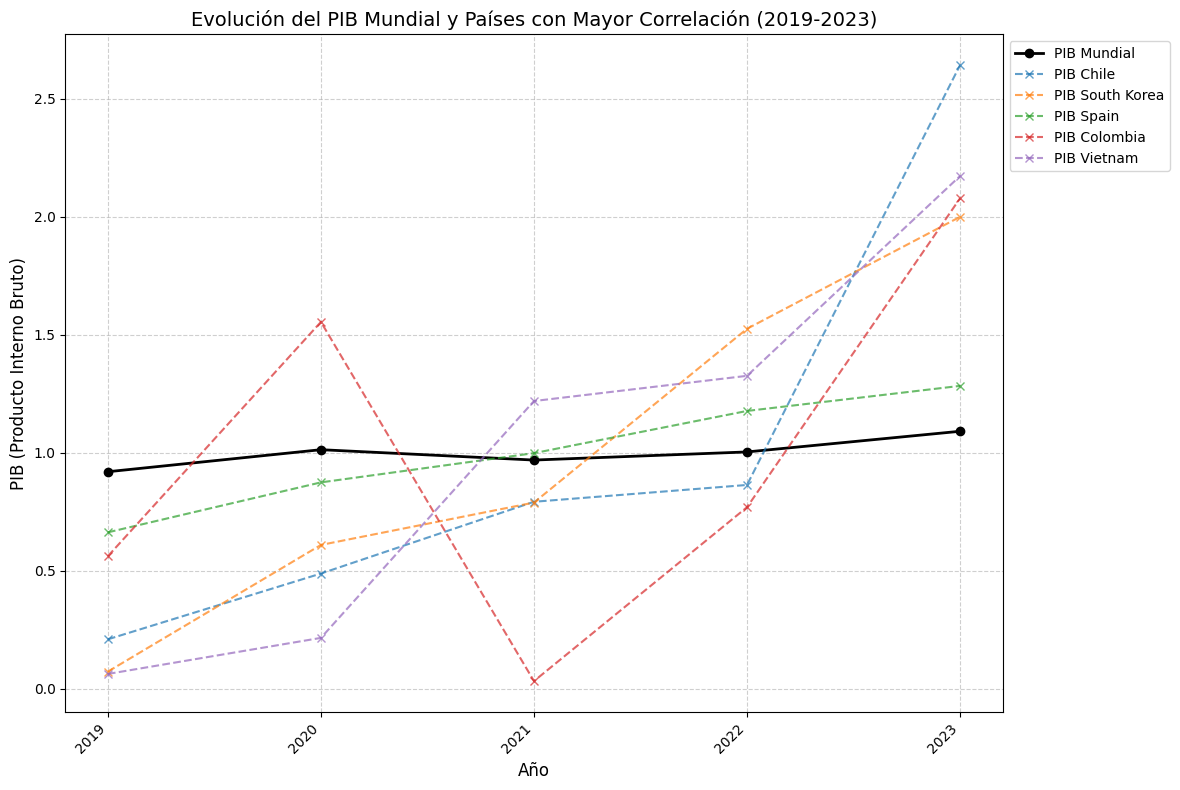

In [196]:
#Grafico de correlación
plt.figure(figsize=(14, 8)) # Aumentar el tamaño para mejor visualización

#Normalización para quitar 'ceros'
pib_norm = pib_T / pib_T.mean()

# Graficar el PIB Mundial
plt.plot(pib_T.index, pib_norm['World'], marker='o', linestyle='-', color='black', linewidth=2, label='PIB Mundial')

# Graficar el PIB de los 5 países más correlacionados (usando la variable top5_paises)
for country in top5_paises:
    # Asegurarse de que el país existe en las columnas de pib_T
    if country in pib_T.columns:
        plt.plot(pib_T.index, pib_norm[country], marker='x', linestyle='--', alpha=0.7, label=f'PIB {country}')
    else:
        print(f"Advertencia: El país '{country}' no se encontró en las columnas de pib_T.")

plt.xlabel('Año', fontsize=12)
plt.ylabel('PIB (Producto Interno Bruto)', fontsize=12)
plt.title('Evolución del PIB Mundial y Países con Mayor Correlación (2019-2023)', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) # Mover la leyenda fuera del gráfico
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar y alinear etiquetas del eje X
plt.yticks(fontsize=10)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar el diseño para dejar espacio para la leyenda
plt.ticklabel_format(style='plain', axis='y') # Evitar notación científica en el eje Y
plt.show()

Nuestro grafico nos muestra la evolución del PIB mundial (línea negra solida) y los cinco países con mayor correlación lineal.

Se nota un decaimiento de todas las líneas en el año 2020 (lo que puede relacionarse al COVID-19) y se recuperan entre 2021 y 2023, con curvas paralelas que confirman la alta correlación.

En cuanto al modelo de regresión, el grafico muestra el ajuste perfecto del modelo donde el PIB mundial se predice usando estos países, las tendencias alineadas explican el 100% de variabilidad.

### Conclusiones
Al observar la 'Evaluación del modelo de regresión lineal múltiple' podemos inferir que R-cuadrado (R^2) es la métrica más importante para este análisis, ya que mide que tan bien la línea de regresión se ajusta a los datos. Un valor de R^2 cercano a 1 indica que el PIB del país o países elegidos son excelentes predictores del PIB mundial. Al Contrario, un valor cercano a 0 significa que no hay una regresión lineal.

Por lo tanto, con el alto valor obtenido indica que los países seleccionados para este análisis tienen una fuerte relación lineal con el PIB mundial.

Por otra parte, el error cuadrático medio (MSE) tiene un valor muy bajo, lo que confirma que las predicciones del modelo son extremadamente cercanas a los valores reales.


## Modelo 2

### Paso 1: Preparación y organización de los datos

In [197]:
#importacion dataset PIB
pib = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks_2AÑO1CUATRI/Aprendizaje Automatico/Clase 4/archivos_ejercicios/pib_banco_mundial_50.csv', delimiter=';')
pib.head()

,Country Name,Country Code,2019,2020,2021,2022,2023
0,Argentina,ARG,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,BRA,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,USA,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,CHN,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,IND,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12


In [198]:
#Información del dataframe
print('Información del dataframe:')
pib.info()
print('Descripcion del dataframe')
pib.describe()
print('Columnas del dataframe:')
pib.columns

Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  51 non-null     object 
 1   Country Code  51 non-null     object 
 2   2019          51 non-null     float64
 3   2020          51 non-null     float64
 4   2021          51 non-null     float64
 5   2022          51 non-null     float64
 6   2023          51 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB
Descripcion del dataframe
Columnas del dataframe:


Index(['Country Name', 'Country Code', '2019', '2020', '2021', '2022', '2023'], dtype='object')

In [199]:
#Eliminacion de columna 'Country Code'

pib.drop('Country Code', axis=1, inplace=True)
pib.head

<bound method NDFrame.head of             Country Name          2019          2020          2021  \
0              Argentina  1.492100e+12  5.090000e+11  2.781000e+11   
1                 Brazil  8.961000e+11  2.279500e+12  1.978400e+12   
2          United States  2.164700e+12  6.277000e+11  6.323000e+11   
3                  China  8.600000e+09  1.491000e+11  1.204200e+12   
4                  India  8.261000e+11  1.537000e+12  2.098200e+12   
5                Germany  1.740500e+12  1.451500e+12  1.356700e+12   
6                 France  6.020000e+11  6.402000e+11  1.836300e+12   
7         United Kingdom  2.299700e+12  1.399400e+12  7.928000e+11   
8                  Italy  7.559000e+11  2.445200e+12  7.028000e+11   
9                  Spain  3.763000e+11  4.963000e+11  5.665000e+11   
10                Canada  1.941300e+12  2.408800e+12  2.235900e+12   
11                Mexico  1.946100e+12  2.089600e+12  9.062000e+11   
12                 Japan  3.257000e+11  1.787700e+12  8.818000e+11   
13           South Korea  6.480000e+10  5.361000e+11  6.938000e+11   
14             Australia  1.876400e+12  2.487300e+12  7.270000e+10   
15                Russia  1.325800e+12  2.570000e+11  1.585200e+12   
16          South Africa  1.842200e+12  1.737900e+12  1.843000e+11   
17                 Egypt  2.213200e+12  1.049800e+12  1.571800e+12   
18               Nigeria  4.594000e+11  2.369500e+12  1.468300e+12   
19                 Kenya  2.946000e+11  1.150000e+10  1.570700e+12   
20                 Chile  1.069000e+11  2.484000e+11  4.028000e+11   
21              Colombia  4.810000e+11  1.329400e+12  2.860000e+10   
22                  Peru  1.757800e+12  2.416400e+12  5.526000e+11   
23             Venezuela  1.324600e+12  2.230500e+12  2.440000e+12   
24               Ecuador  1.933400e+12  2.539000e+11  1.661100e+12   
25               Bolivia  8.580000e+11  2.489100e+12  1.546400e+12   
26              Paraguay  1.604000e+12  1.303300e+12  1.776100e+12   
27               Uruguay  6.019000e+11  6.170000e+11  7.709000e+11   
28          Saudi Arabia  2.429700e+12  1.486200e+12  2.479000e+11   
29  United Arab Emirates  2.214000e+12  5.807000e+11  1.905100e+12   
30                Turkey  2.446000e+11  1.551100e+12  2.032700e+12   
31                  Iran  2.012500e+12  1.577000e+11  1.757200e+12   
32              Pakistan  2.432200e+12  1.778600e+12  1.720500e+12   
33            Bangladesh  1.487300e+12  7.310000e+11  6.893000e+11   
34             Indonesia  1.503400e+12  2.486400e+12  8.702000e+11   
35              Thailand  1.011400e+12  2.381700e+12  4.476000e+11   
36               Vietnam  5.330000e+10  1.808000e+11  1.018700e+12   
37           Philippines  4.137000e+11  9.445000e+11  2.465500e+12   
38              Malaysia  1.400900e+12  3.948000e+11  1.696900e+12   
39             Singapore  3.651000e+11  1.752100e+12  1.950000e+12   
40                Sweden  2.296000e+12  5.882000e+11  7.828000e+11   
41                Norway  8.252000e+11  3.935000e+11  1.992000e+11   
42               Denmark  1.230300e+12  2.656000e+11  1.491300e+12   
43               Finland  5.497000e+11  1.230000e+12  1.856500e+12   
44                Poland  2.031000e+11  2.322400e+12  2.116300e+12   
45        Czech Republic  1.820100e+12  1.978400e+12  3.443000e+11   
46               Hungary  2.118500e+12  1.562700e+12  2.447900e+12   
47                Greece  7.337000e+11  3.544000e+11  5.649000e+11   
48              Portugal  1.138000e+11  1.863200e+12  1.225700e+12   
49           Netherlands  9.981000e+11  2.374600e+12  2.095300e+12   
50                 World  5.857570e+13  6.451670e+13  6.172130e+13   

            2022          2023  
0   7.350000e+11  1.361300e+12  
1   1.322700e+12  1.234500e+12  
2   1.705900e+12  1.531200e+12  
3   2.200000e+12  9.592000e+11  
4   2.001300e+12  1.486400e+12  
5   1.823800e+12  4.185000e+11  
6   2.447700e+12  1.799200e+12  
7   1.191400e+12  2.180100e+12  
8   1.006100e+12  1.090600e+12  

In [200]:
# Cambio de encabezado del DataFrame
pib_T = pib.set_index('Country Name').T
pib_T.head()

Country Name,Argentina,Brazil,United States,China,India,Germany,France,United Kingdom,Italy,Spain,...,Norway,Denmark,Finland,Poland,Czech Republic,Hungary,Greece,Portugal,Netherlands,World
2019,1.492100e+12,8.961000e+11,2.164700e+12,8.600000e+09,8.261000e+11,1.740500e+12,6.020000e+11,2.299700e+12,7.559000e+11,3.763000e+11,...,8.252000e+11,1.230300e+12,5.497000e+11,2.031000e+11,1.820100e+12,2.118500e+12,7.337000e+11,1.138000e+11,9.981000e+11,5.857570e+13
2020,5.090000e+11,2.279500e+12,6.277000e+11,1.491000e+11,1.537000e+12,1.451500e+12,6.402000e+11,1.399400e+12,2.445200e+12,4.963000e+11,...,3.935000e+11,2.656000e+11,1.230000e+12,2.322400e+12,1.978400e+12,1.562700e+12,3.544000e+11,1.863200e+12,2.374600e+12,6.451670e+13
2021,2.781000e+11,1.978400e+12,6.323000e+11,1.204200e+12,2.098200e+12,1.356700e+12,1.836300e+12,7.928000e+11,7.028000e+11,5.665000e+11,...,1.992000e+11,1.491300e+12,1.856500e+12,2.116300e+12,3.443000e+11,2.447900e+12,5.649000e+11,1.225700e+12,2.095300e+12,6.172130e+13
2022,7.350000e+11,1.322700e+12,1.705900e+12,2.200000e+12,2.001300e+12,1.823800e+12,2.447700e+12,1.191400e+12,1.006100e+12,6.679000e+11,...,1.422300e+12,2.127700e+12,6.803000e+11,1.494800e+12,1.727000e+11,2.110900e+12,3.052000e+11,4.290000e+10,1.860600e+12,6.391170e+13
2023,1.361300e+12,1.234500e+12,1.531200e+12,9.592000e+11,1.486400e+12,4.185000e+11,1.799200e+12,2.180100e+12,1.090600e+12,7.281000e+11,...,1.394500e+12,6.452000e+11,2.243000e+12,1.479800e+12,1.176500e+12,1.707900e+12,1.391700e+12,2.257800e+12,1.628000e+12,6.948090e+13


In [201]:
#Transformación de los datos a tipo numerico
pib_T = pib_T.apply(pd.to_numeric)
pib_T.tail()

Country Name,Argentina,Brazil,United States,China,India,Germany,France,United Kingdom,Italy,Spain,...,Norway,Denmark,Finland,Poland,Czech Republic,Hungary,Greece,Portugal,Netherlands,World
2019,1.492100e+12,8.961000e+11,2.164700e+12,8.600000e+09,8.261000e+11,1.740500e+12,6.020000e+11,2.299700e+12,7.559000e+11,3.763000e+11,...,8.252000e+11,1.230300e+12,5.497000e+11,2.031000e+11,1.820100e+12,2.118500e+12,7.337000e+11,1.138000e+11,9.981000e+11,5.857570e+13
2020,5.090000e+11,2.279500e+12,6.277000e+11,1.491000e+11,1.537000e+12,1.451500e+12,6.402000e+11,1.399400e+12,2.445200e+12,4.963000e+11,...,3.935000e+11,2.656000e+11,1.230000e+12,2.322400e+12,1.978400e+12,1.562700e+12,3.544000e+11,1.863200e+12,2.374600e+12,6.451670e+13
2021,2.781000e+11,1.978400e+12,6.323000e+11,1.204200e+12,2.098200e+12,1.356700e+12,1.836300e+12,7.928000e+11,7.028000e+11,5.665000e+11,...,1.992000e+11,1.491300e+12,1.856500e+12,2.116300e+12,3.443000e+11,2.447900e+12,5.649000e+11,1.225700e+12,2.095300e+12,6.172130e+13
2022,7.350000e+11,1.322700e+12,1.705900e+12,2.200000e+12,2.001300e+12,1.823800e+12,2.447700e+12,1.191400e+12,1.006100e+12,6.679000e+11,...,1.422300e+12,2.127700e+12,6.803000e+11,1.494800e+12,1.727000e+11,2.110900e+12,3.052000e+11,4.290000e+10,1.860600e+12,6.391170e+13
2023,1.361300e+12,1.234500e+12,1.531200e+12,9.592000e+11,1.486400e+12,4.185000e+11,1.799200e+12,2.180100e+12,1.090600e+12,7.281000e+11,...,1.394500e+12,6.452000e+11,2.243000e+12,1.479800e+12,1.176500e+12,1.707900e+12,1.391700e+12,2.257800e+12,1.628000e+12,6.948090e+13


### Paso 2: Correlación de los datos

En este paso, aislamos los datos del PIB mundial y los de cada país para calcular su coeficiente de correlación. Un valor cercano a 1, indica una fuerte relación lineal.

In [202]:
#Definición de variable dependiente (Y) e independiente (X) para prueba
X = pib_T[['United States', 'China']]
Y = pib_T['World']

### Paso 3:  Modelado de datos y Regresión Lineal
Para validar la relación, utilizamos un modelo de regresión lineal.
La variable independiente (X) será el PIB del país, y la variable dependiente (Y) será el PIB mundial. La métrica R-cuadrado (R^2) nos indicará qué tan bien nuestro modelo predice el PIB mundial.



In [203]:
#Creación del modelo de regresion lineal
modelo_regresion = linear_model.LinearRegression()

#Entrenamiento del modelo con lo datos de X e Y
modelo_regresion.fit(X, Y)

LinearRegression()

In [204]:
#Muestreo de la precision del modelo (R Cuadrado)
print('Precision del modelo (R^2):', modelo_regresion.score(X, Y))

Precision del modelo (R^2): 0.12300479671373676


Al tener una precisión muy baja, decido agregarle mas paises para una nueva evaluación

In [205]:
#Agregamos mas variables
X = pib_T[['United States', 'China', 'India', 'Japan', 'Germany']]

#Re-entrenamiento del modelo con las nuevas variables
modelo_regresion.fit(X, Y)

#Resultado del re-entrenamiento
print('Precision del nuevo modelo (R^2):', modelo_regresion.score(X, Y))

Precision del nuevo modelo (R^2): 1.0


In [206]:
#Evaluación del modelo multiple
print('Coeficientes:', modelo_regresion.coef_)
print('Intercepto:', modelo_regresion.intercept_)
print('R^2:', r2_score(Y, Y_pred))
print('MSE:', mean_squared_error(Y, Y_pred))

Coeficientes: [ 2.90279786  3.19512184 -0.87323671  6.61042208 -3.14890168]
Intercepto: 56313565181232.625
R^2: 1.0
MSE: 2.44140625e-05


In [207]:
#Prediccion de valores
predicciones = modelo_regresion.predict(X)

#Compara las prediciones con los valores reales (Y)
print('Valores reales (Y):')
print(Y)
print('\nPredicciones del modelo:')
print(predicciones)

Valores reales (Y):
2019    5.857570e+13
2020    6.451670e+13
2021    6.172130e+13
2022    6.391170e+13
2023    6.948090e+13
Name: World, dtype: float64

Predicciones del modelo:
[5.85757e+13 6.45167e+13 6.17213e+13 6.39117e+13 6.94809e+13]


### Grafico y su análisis

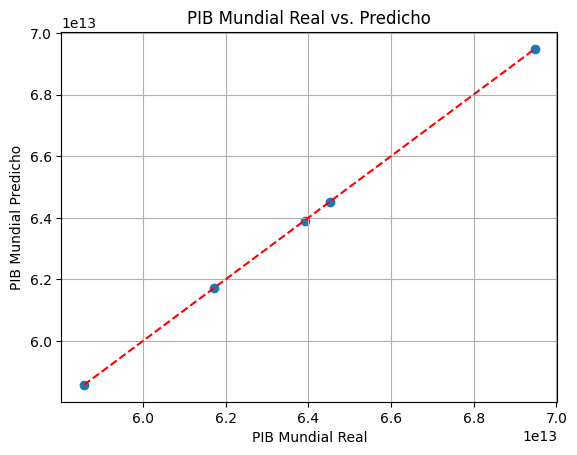

In [208]:
#Grafico para analizar la regresion lineal
plt.scatter(Y, predicciones)
plt.xlabel('PIB Mundial Real')
plt.ylabel('PIB Mundial Predicho')
plt.title('PIB Mundial Real vs. Predicho')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='--')
plt.grid(True)
plt.show()

En este grafico scatter-plot podemos observar 5 puntos que se alinean exactamente sobre nuestra recta sin dispersión. No hay desviaciones notables, lo que indica coincidencia total entre 'reales' y 'predichos'.

Tambien observamos una precisión perfecta, confirmando el ajuste ideal de (R^2) = 1.0. Esto valida que el modelo captura todas las tendencias, incluyendo la caída por COVID-19 (2020) y su posterior recuperación.

### Conclusiones

Para finalizar, vemos como nuestro grafico confirma el exito de este segundo modelo, un predictor que explica el PIB mundial a través de sus aliados económicos más estables.

#Actividad 2

Para esta actividad se ha creado un archivo usuarios_win_mac_lin.csv con datos de entrada a modo de ejemplo para clasificar si el usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux.

Nuestra información de entrada son 4 características que se tomó de una web que utiliza Google Analytics y son:

● Duración de la visita en Segundos

● Cantidad de Páginas Vistas durante la Sesión

● Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc)

● Suma del Valor de las acciones (cada acción lleva asociada una valoración
de importancia)

Como la salida es discreta, asignaremos los siguientes valores a las etiquetas:

0 – Windows

1 – Macintosh

2 - Linux



## Analisis y predicciones con los datos originales

Para obtener una evaluación más realista y confiable del rendimiento del modelo, implemente una división de los datos en dos conjuntos:
* Entrenamiento: El 80% de los datos, utilizados para que el modelo "aprenda" los patrones.
* Prueba: El 20% de los datos, reservados para evaluar el modelo con información que nunca ha visto.

Esta técnica permite medir la capacidad de nuestro modelo para generalizar, es decir, para realizar predicciones precisas en nuevos datos.

### Paso 1: Carga de datos

In [209]:
#importacion del dataset
usuarios = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks_2AÑO1CUATRI/Aprendizaje Automatico/Clase 4/archivos_ejercicios/usuarios_win_mac_lin.csv', delimiter=',')
print(usuarios.head())
usuarios.info()

   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


### Paso 2: Creacion y entrenamiento del modelo

In [210]:
#determinamos las variables X
X = usuarios.iloc[:, :4]

#determinamos la variable Y
Y = usuarios.iloc[:, 4]

In [211]:
#Division de datos para entrenamiento y prueba (80-20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [212]:
#creacion del modelo
modelo_clasificacion = LogisticRegression(max_iter=1000)

#entrenamiento del modelo
modelo_clasificacion.fit(X_train, Y_train)

#evaluacion de la precision
precision = modelo_clasificacion.predict(X_test)
precision = accuracy_score(Y_test, precision)
print(f'Precision del modelo: {precision * 100:.2f}%')

Precision del modelo: 67.65%


### Paso 3: Prueba del modelo y analisis de la matriz de confusion

In [213]:
#matriz de confusion
prediccion = modelo_clasificacion.predict(X_test)
matriz_confusion = confusion_matrix(Y_test, prediccion)
print('Matriz de confusion:')
print(matriz_confusion)

Matriz de confusion:
[[13  2  1]
 [ 8  4  0]
 [ 0  0  6]]


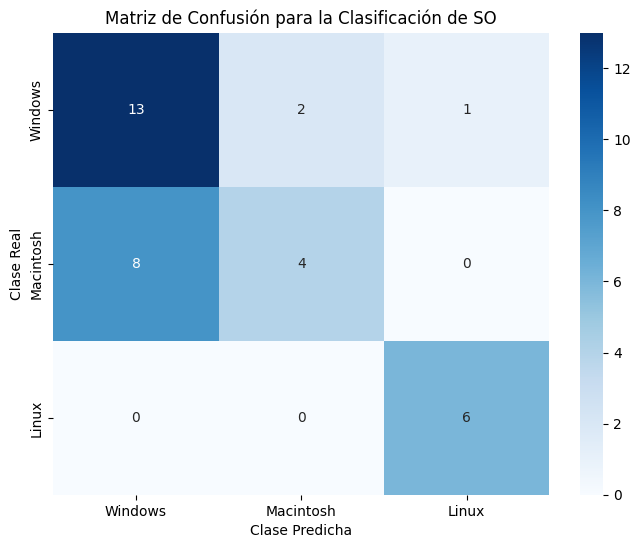

              precision    recall  f1-score   support

           0       0.62      0.81      0.70        16
           1       0.67      0.33      0.44        12
           2       0.86      1.00      0.92         6

    accuracy                           0.68        34
   macro avg       0.71      0.72      0.69        34
weighted avg       0.68      0.68      0.65        34



In [214]:
#Matriz de confusion VISUAL
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Windows', 'Macintosh', 'Linux'],
            yticklabels=['Windows', 'Macintosh', 'Linux'])
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión para la Clasificación de SO')
plt.show()
print(classification_report(Y_test, prediccion))

La matriz de confusión con los datos de prueba revela el siguiente rendimiento:

* Clase Windows (0): El modelo clasificó correctamente a la mayoría de los usuarios de Windows.
* Clase Macintosh (1): El modelo tiene más dificultades para clasificar correctamente a los usuarios de Macintosh. A menudo los confunde con usuarios de Windows.
* Clase Linux (2): El modelo es muy preciso en esta categoría.

### Conclusión

Para finalizar este informe, podemos apreciar que la precisión general del modelo es de 67.65%. Esto define que si bien es una herramienta efectiva, tambien presenta algunos puntos de mejora. Una posible mejora a futuro podria ser analizar y probar con mas datos, o normalizar las variables de entrada para que todas tengan la misma escala, ya que el modelo confirma que ha aprendido a generalizar, aunque tiene un punto de mejora claro para clasificar los usuarios de Macintosh ya que tiende a confundir a los usuarios de Macintosh con los de Windows.

## Analisis con nuevos valores de variables.

In [215]:
# Armado nuevo dataframe
columnas_prediccion = ['duracion',
                       'paginas',
                       'acciones',
                       'valor']

Para esta predicción, cree una lista de tres usuarios, cada uno con sus propios atributos.

In [216]:
#Datos de nuevos usuarios
nuevos_usuarios = [[300, 5, 10, 50], #Prueba un usuario con 300 segundos, 5 paginas, 10 acciones y valor de 50
                   [150, 2, 4, 10], #Prueba un usuario con valores bajos
                   [600, 10, 25, 150]] #Prueba un usuario con valores altos

In [217]:
#Conversion de la lista a dataframe de Pandas
X_nuevos = pd.DataFrame(nuevos_usuarios, columns=columnas_prediccion)

In [218]:
#Nuevas predicciones
predicciones_nuevas = modelo_clasificacion.predict(X_nuevos)
print('Predicciones para nuevos usuarios:')

for usuario, prediccion in enumerate(predicciones_nuevas):
  if prediccion == 0:
       os = 'Windows'
  elif prediccion == 1:
       os = 'Macintosh'
  else:
        os = 'Linux'
  print(f'Usuario {usuario + 1} es un usuario {os}')

Predicciones para nuevos usuarios:
Usuario 1 es un usuario Macintosh
Usuario 2 es un usuario Windows
Usuario 3 es un usuario Macintosh


### Conclusión de la Clasificación

Las predicciones para los nuevos usuarios demuestran que el modelo de regresión logística ha aprendido a identificar patrones en los datos de entrada. La capacidad de clasificar a estos usuarios en diferentes categorías de sistemas operativos confirma que el modelo es una herramienta efectiva para este problema.

# Informe sobre la libreria 'Scikit-learn' en el Análisis de datos.

Scikit-learn es una de las librerías de aprendizaje automático más importantes de Python. Ofrece un conjunto de herramientas eficientes y de código abierto para tareas de modelado predictivo y análisis de datos. Su uso en el notebook para las dos actividades fue fundamental, permitiendo la implementación de modelos complejos con pocas líneas de código.

Los imports utilizados fueron:

from sklearn.linear_model import LinearRegression: Esta importación fue clave para la Actividad 1. Permitió crear y entrenar el modelo de regresión lineal, el cual se usó para encontrar y validar la relación entre el PIB de un país y el PIB mundial. La función fit entrenó el modelo y la función predict se utilizó para estimar el PIB mundial.

from sklearn.metrics import r2_score, mean_squared_error: Estas métricas se utilizaron para la evaluación cuantitativa del modelo de regresión. El R-cuadrado (r2_score) midió qué tan bien el modelo se ajustaba a los datos, y el Error Cuadrático Medio (mean_squared_error) calculó la precisión de las predicciones.

from sklearn.linear_model import LogisticRegression: Esta importación fue la base para la Actividad 2. Permitió implementar un modelo de clasificación que aprendió a predecir el sistema operativo de un usuario basándose en sus características de navegación.

from sklearn.metrics import confusion_matrix: Esta métrica fue crucial para la evaluación del modelo de clasificación. La matriz de confusión permitió visualizar el rendimiento del modelo, mostrando con claridad cuántas predicciones fueron correctas e incorrectas para cada una de las clases (Windows, Macintosh, Linux).

from sklearn.model_selection import train_test_split: Esta herramienta es fundamental en un análisis robusto. Se usó para dividir los datos en conjuntos de entrenamiento y prueba, asegurando una evaluación imparcial y realista del modelo.

En resumen, Scikit-learn fue la columna vertebral del análisis. Su clara y simple sintaxis hizo posible la elaboración de ambos modelos, su evaluación rigurosa, y la obtención de conclusiones sólidas a partir de los datos.